<a href="https://colab.research.google.com/github/GonzaloMartin/ITBA-Certificacion-Profesional-Python/blob/main/Clase_9%20(2)_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/ITBA-Python/Certificacion-Profesional-Python/main/assets/clase2/Headers%20c%C3%A1talogo_Mesa%20de%20trabajo%201%20copia%2044.jpg" width="800">



# Certificación profesional de Python

#### _Resueltos de [@GonzaloMartin](https://github.com/GonzaloMartin)._

# Clase 9 (Parte 2)

El objetivo de la clase es seguir sumando experiencia de trabajo con programación aprendiendo los siguientes temas.

*   Herramientas de visualización
*   Desde Python: Matplotlib
*   Web: Grafana

La clase incluye teoría y práctica sobre cada tema aprendido.

<img src="https://raw.githubusercontent.com/ITBA-Python/Certificacion-Profesional-Python/main/assets/clase2/LOGOTIPO_sin_fondo_positivo_sin_bajada.png" width="400">



# Herramientas de visualización

## Matplotlib

Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy. Proporciona una API, pylab, diseñada para recordar a la de MATLAB.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Un ejemplo simple

Matplotlib grafica los datos en figuras (por ejemplo, ventanas, widgets de Jupyter, etc.), cada una de las cuales puede contener uno o más ejes. La forma más sencilla de crear una figura con ejes es usando pyplot.subplots.
Luego podemos usar Axes.plot para dibujar algunos datos en los ejes:

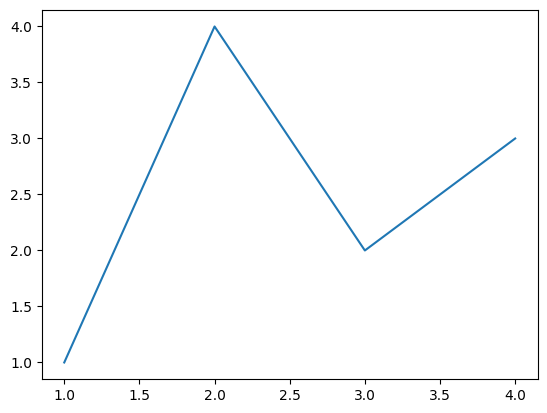

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

## Partes de una figura

<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png" style="height: 1000px; width:1000px;"/>

### Figura

Toda la figura. La figura contiene todos los ejes secundarios, un grupo de "artefactos" (títulos, leyendas de figuras, barras de colores, etc.) e incluso subfiguras anidadas (una figura se puede subdividir en varias subfiguras).

La forma más fácil de crear una nueva Figura es con pyplot:

In [13]:
print("Una figura vacía sin ejes:\n")
fig = plt.figure()  # an empty figure with no Axes

Una figura vacía sin ejes:



<Figure size 640x480 with 0 Axes>

Una figura con un eje simple:



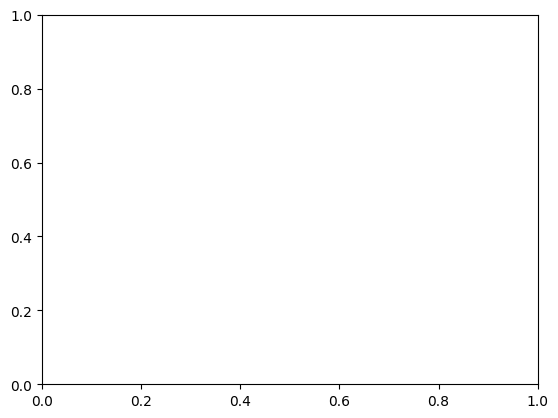

In [12]:
print("Una figura con un eje simple:\n")
fig, ax = plt.subplots()  # a figure with a single Axes

Una figura con ejes grillados de 2x2:



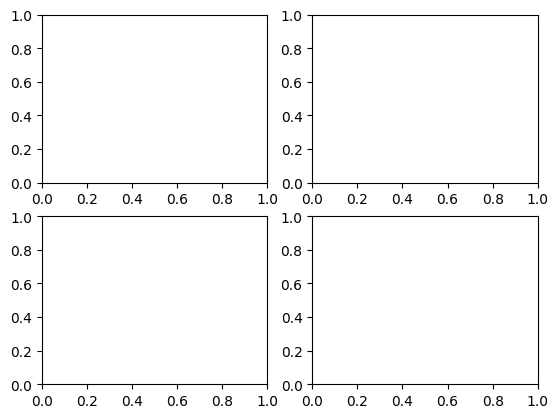

In [14]:
print("Una figura con ejes grillados de 2x2:\n")
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

A menudo es conveniente crear los Ejes junto con la Figura, pero también puede agregar Ejes manualmente más adelante. Hay que tener en cuenta que muchos backends de Matplotlib admiten el zoom y la panorámica en las ventanas de figuras.

Comparar qt con inline.

### Axes

Un "Axes" (ejes) es un artefacto adjunto a una figura que contiene una área para trazar datos y, por lo general, incluye dos (o tres en el caso de 3D) objetos Axis (eje) que proporcionan marcas y etiquetas de marca para proporcionar escalas para los datos en los ejes.

Cada eje también tiene un título (establecido a través de set_title()), una etiqueta x (establecida a través de set_xlabel()) y una etiqueta y configurada a través de set_ylabel()).

La clase Axes y sus funciones miembro son el punto de entrada principal para trabajar con la interfaz OOP y tienen la mayoría de los métodos de trazado definidos en ellos (por ejemplo, ax.plot(), que se muestra arriba, usa el método plot)

### Axis

Estos objetos establecen la escala y los límites y generan marcas (las marcas en el eje) y etiquetas de marcas (cadenas que etiquetan las marcas).

### Artist

Básicamente, todo lo visible en la figura es un artist (incluso los objetos Figure, Axes y Axis). Esto incluye objetos de texto, objetos Line2D, objetos de colección, patchs, etc. Cuando se representa la figura, todos los artists se dibujan en los ejes. La mayoría de los artists están atados a un eje; dicho artista no puede ser compartido por múltiples ejes, ni movido de uno a otro.

Text(0, 0.5, 'entry b')

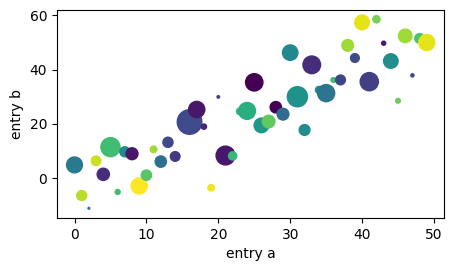

In [17]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

Hay esencialmente dos formas de usar Matplotlib:

- Crear explícitamente figuras y ejes, y llamar a métodos en ellos (el "estilo orientado a objetos (OO)").

- Usar pyplot para crear y administrar automáticamente las figuras y los ejes, y use las funciones de pyplot para realizar los gráficos.

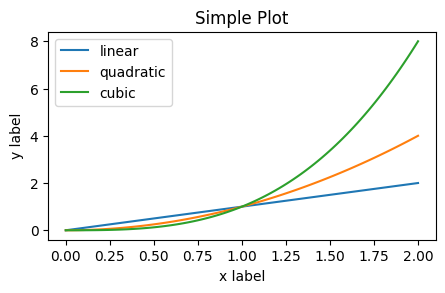

In [18]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

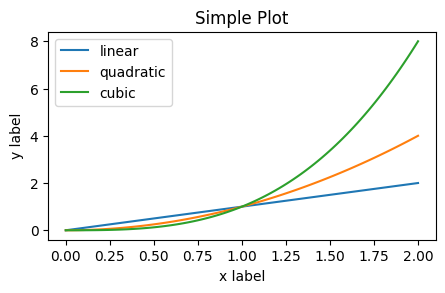

In [19]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7))
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

## Haciendo una función helper

Si necesita hacer los mismos gráficos una y otra vez con diferentes conjuntos de datos, o desea abstraer fácilmente los métodos de Matplotlib, es conveniente armar una función como se muestra a continuación:

In [20]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

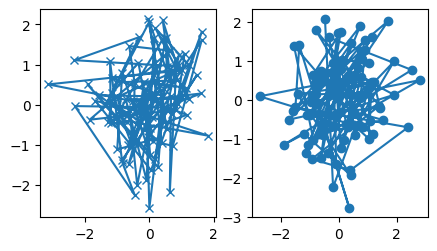

In [21]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

### Styling Artists

La mayoría de los métodos de ploteado tienen opciones de estilo para los artists, a las que se puede acceder cuando se llama a un método de ploteo o desde un "setter" en el Artista. En el gráfico a continuación, configuramos manualmente el color, el ancho de línea y el estilo de línea de los artistas creados, y configuramos el estilo de línea de la segunda línea con set_linestyle.

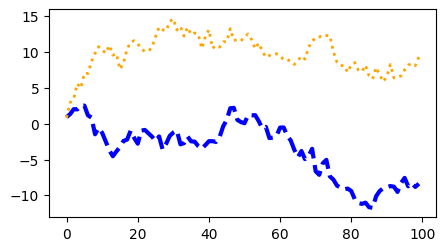

In [22]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

### Colores

Matplotlib tiene una gama muy flexible de colores ; hay tutorial de colores para obtener una lista de especificaciones. Algunos artists tomarán varios colores. es decir, para un scatter plot, el borde de los marcadores puede ser de distintos con respecto al interior-:

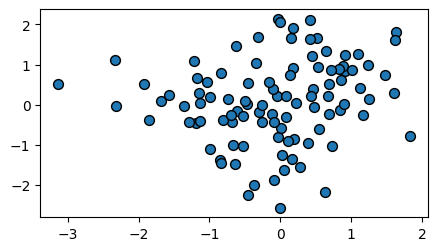

In [23]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

### Linewidths, linestyles, y markersizes

Los anchos de línea suelen estar en puntos tipográficos (1 pt = 1/72 de pulgada) y están disponibles para artists que tienen líneas ploteadas. Del mismo modo, las líneas ploteadas pueden tener un estilo de línea.

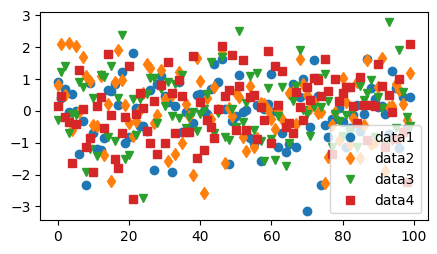

In [24]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

## Nombrando plots

### Axes labels y texts

set_xlabel, set_ylabel y set_title se utilizan para agregar texto en las ubicaciones indicadas. El texto también se puede agregar directamente al gráfico usando text:

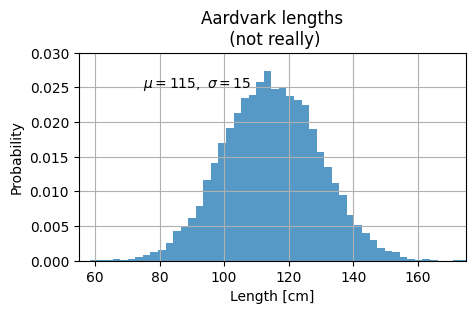

In [25]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7))
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);


Todas las funciones **text** devuelven una instancia de matplotlib.text.Text. Al igual que con los ejemplos anteriores, se pueden personalizar las propiedades pasando argumentos a las funciones de **text**:

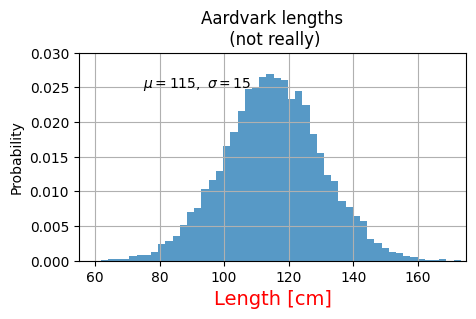

In [26]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7))
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]', fontsize=14, color='red')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);


## Expresiones matemáticas

Dentro de un texto se pueden utilizar ecuaciones en formato Tex.

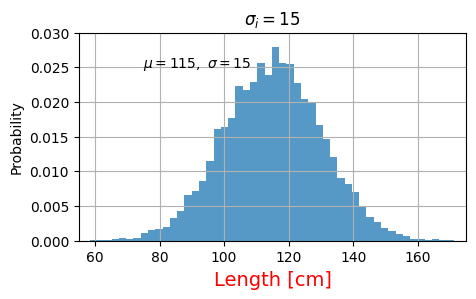

In [27]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7))
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]', fontsize=14, color='red')
ax.set_ylabel('Probability')
ax.set_title(r'$\sigma_i=15$')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

## Anotaciones

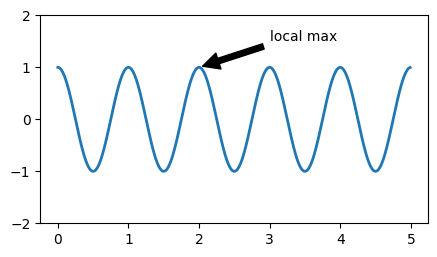

In [28]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

## Legends

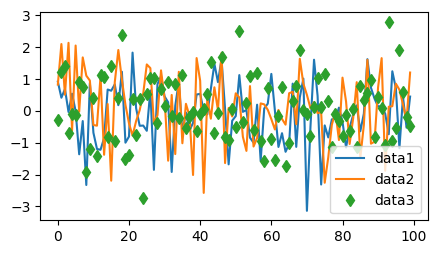

In [29]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

## Escalas y ticks

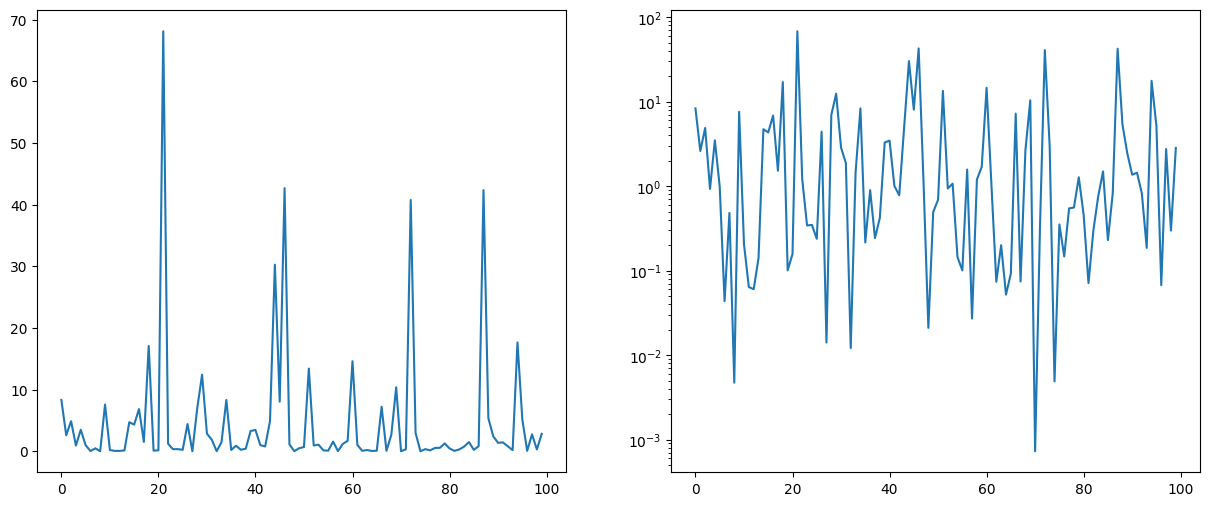

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

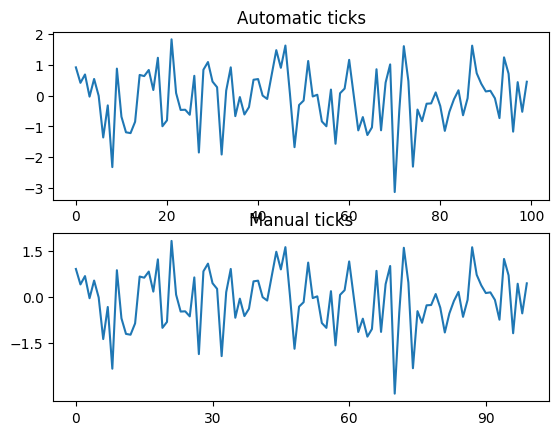

In [31]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30))
axs[1].set_yticks([-1.5, 0, 1.5])
axs[1].set_title('Manual ticks');

## Gráficos de DB

<img src="https://www.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg"/>

In [32]:
import sqlite3

# Creamos una conexión con la base de datos
con = sqlite3.connect('chinook.db')

# Creamos el curso para interactuar con los datos
cursor = con.cursor()

x = 7
# Ejecutar comandos de SQL
res = cursor.execute(f''' SELECT * FROM media_types LIMIT {x};''')
for row in res:
    print(row)

# Cerramos la conexión
con.close()

(1, 'MPEG audio file')
(2, 'Protected AAC audio file')
(3, 'Protected MPEG-4 video file')
(4, 'Purchased AAC audio file')
(5, 'AAC audio file')


In [33]:
import pandas as pd

In [34]:
# Creamos una conexión con la base de datos
con = sqlite3.connect('chinook.db')
df_types = pd.read_sql(con=con, sql= "SELECT * FROM media_types")
df_tracks = pd.read_sql(con=con, sql= "SELECT * FROM tracks")
df_invoices = pd.read_sql(con=con, sql= "SELECT * FROM invoices")
con.close()

In [35]:
df_invoices.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


In [36]:
df_types

,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


In [37]:
df_tracks.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


<Axes: >

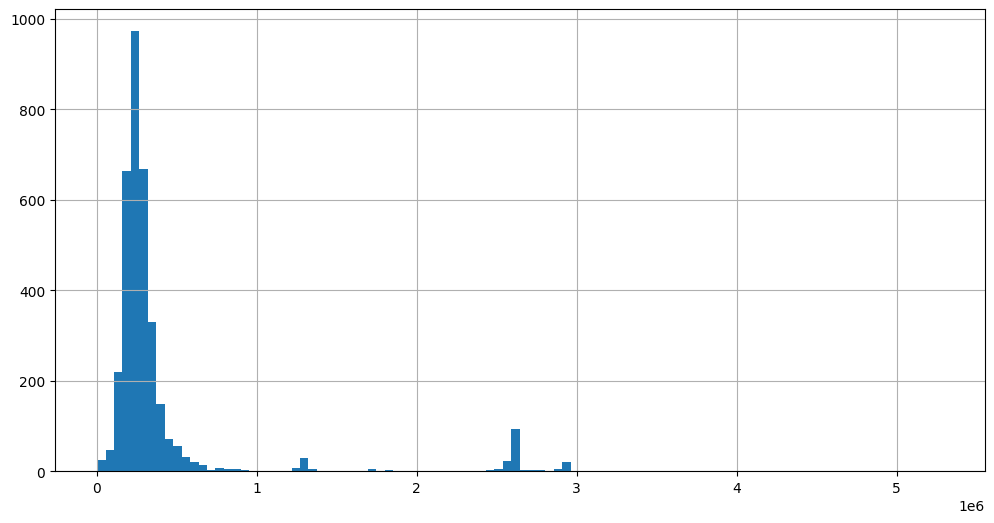

In [38]:
%matplotlib inline
ax, fig = fig, ax = plt.subplots(figsize=(12, 6))
df_tracks.Milliseconds.hist(bins=100, ax = ax)

Supongamos que me interesa ver las distribuciones de MediaTypeID

In [42]:
df_merge = pd.merge(df_tracks, df_types, left_on = "MediaTypeId", right_on="MediaTypeId",suffixes = ("_track", "_type"))
df_merge

,TrackId,Name_track,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,Name_type
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,MPEG audio file
1,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,MPEG audio file
2,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,MPEG audio file
3,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,MPEG audio file
4,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,MPEG audio file
...,...,...,...,...,...,...,...,...,...,...
3498,3355,Love Comes,265,5,1,"Darius ""Take One"" Minwalla/Jon Auer/Ken String...",199923,3240609,0.99,AAC audio file
3499,3356,Muita Bobeira,266,5,7,Luciana Souza,172710,2775071,0.99,AAC audio file
3500,3357,OAM's Blues,267,5,2,Aaron Goldberg,266936,4292028,0.99,AAC audio file
3501,3358,One Step Beyond,264,5,15,Karsh Kale,366085,6034098,0.99,AAC audio file


<Axes: >

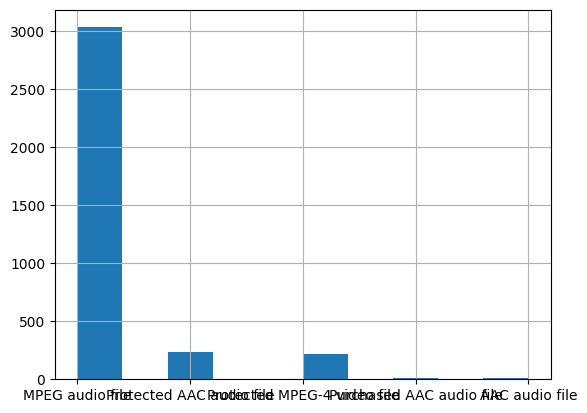

In [40]:
# Horrible, a ver si lo ponemos lindo
df_merge.Name_type.hist()